# B4TM CATS assignment

## Imports

In [178]:
import sys
import os
from pathlib import Path

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load dataset

In [150]:
# Define file paths
data_folder = '../data'
train_call_path = f"{data_folder}/Train_call.tsv"
train_clinical_path = f"{data_folder}/Train_clinical.tsv"

# Load files
df_calls = pd.read_csv(train_call_path, sep='\t')
df_clinical = pd.read_csv(train_clinical_path, sep='\t')

# Show shapes
print(f"Shape of df_calls: {df_calls.shape}")
print(f"Shape of df_clinical: {df_clinical.shape}")

Shape of df_calls: (2834, 104)
Shape of df_clinical: (100, 2)


In [161]:
def process_dataset(
    df_calls:pd.DataFrame,
    df_labels:pd.DataFrame):

    df = df_calls.copy()
    df = df.drop(columns=[
        'Chromosome',
        'Start',
        'End',
        'Nclone']).T
    df = df.rename(columns={col:f'locus_{col}' for col in df.columns})
    df.index.name = 'Sample'
    df = df.reset_index()

    df_merged = pd.merge(
        left=df,
        right=df_clinical,
        on='Sample',
        how='left'
        )
    df_merged.set_index('Sample', inplace=True)

    return df_merged

df = process_dataset(df_calls,df_clinical)
df.head()

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_2825,locus_2826,locus_2827,locus_2828,locus_2829,locus_2830,locus_2831,locus_2832,locus_2833,Subgroup
Sample,,,,,,,,,,,,,,,,,,,,,
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
Array.22,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


## Prepare the data

In [180]:
# Prepare features and label
X, y = df.drop(columns=['Subgroup']), df['Subgroup']

# Encode the 'Subgroup' labels if they are categorical (e.g., 'Group A', 'Group B')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Step 3: Initialize classifier (Random Forest as an example)
clf = RandomForestClassifier(random_state=42)
# Step 4: Train the classifier
clf.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the classifier
y_pred = clf.predict(X_test)
# Step 6: Print evaluation metrics
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       HER2+       1.00      0.86      0.92         7
         HR+       0.67      0.86      0.75         7
  Triple Neg       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.76      0.74      0.74        20
weighted avg       0.76      0.75      0.75        20



In [181]:
# Example data (replace with your data)
# Assuming X is your features and y is the labels
X, y = load_iris(return_X_y=True)

# Outer Cross-validation loop
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inner Cross-validation loop for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Define the model
model = RandomForestClassifier(random_state=42)

# Define GridSearchCV for the inner loop
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform nested cross-validation
nested_score = cross_val_score(grid_search, X, y, cv=outer_cv, n_jobs=-1)

# Print the results
print(f'Nested CV accuracy scores: {nested_score}')
print(f'Average accuracy: {np.mean(nested_score):.4f}')

Nested CV accuracy scores: [1.         0.96666667 0.93333333 1.         0.9       ]
Average accuracy: 0.9600


In [182]:
tung_tung_tung_tung_tung_tung_tung_tung_sahur = df
tung_tung_tung_tung_tung_tung_tung_tung_sahur

,locus_0,locus_1,locus_2,locus_3,locus_4,locus_5,locus_6,locus_7,locus_8,locus_9,...,locus_2825,locus_2826,locus_2827,locus_2828,locus_2829,locus_2830,locus_2831,locus_2832,locus_2833,Subgroup
Sample,,,,,,,,,,,,,,,,,,,,,
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
Array.22,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+


# Process data

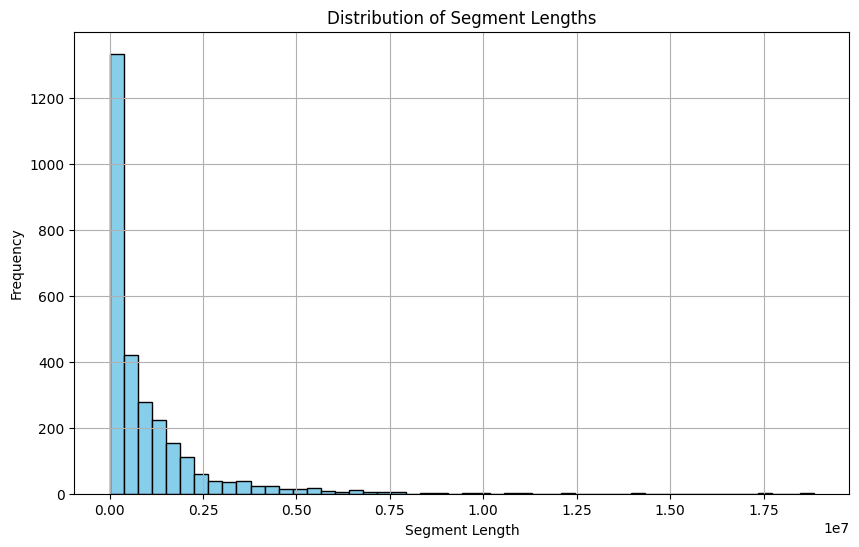

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of segment lengths
plt.figure(figsize=(10, 6))
plt.hist(df_calls['Segment_Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Segment Lengths')
plt.xlabel('Segment Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

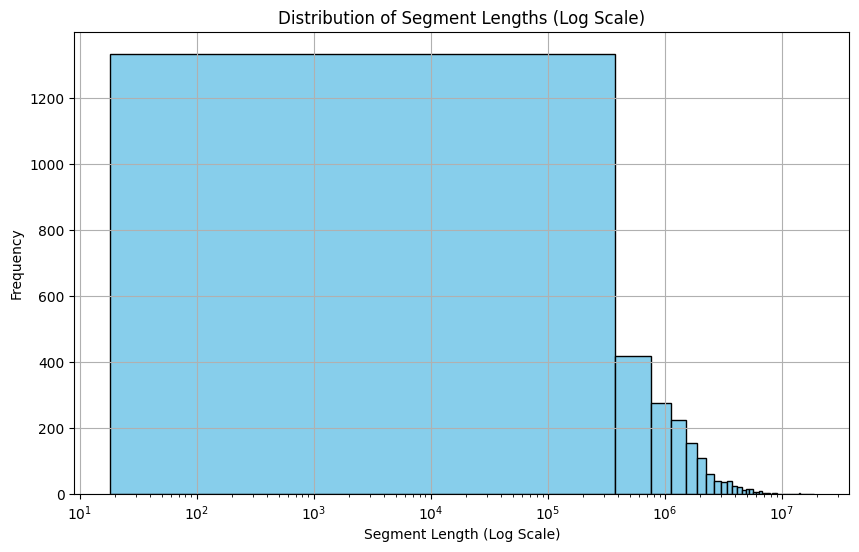

In [13]:
# Plot histogram of segment lengths with log scale on x-axis
plt.figure(figsize=(10, 6))
plt.hist(df_calls['Segment_Length'], bins=50, color='skyblue', edgecolor='black')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Distribution of Segment Lengths (Log Scale)')
plt.xlabel('Segment Length (Log Scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()